In [1]:
import pickle
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models


/home/c02yuli/CISPA-projects/semantic_collision-2023/anaconda3/envs/pb/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Datasets



We offer two datasets (i.e., [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) and [Tiny ImageNet](https://huggingface.co/datasets/Maysee/tiny-imagenet)) to conduct the experiments. For each task, we offer the following three data files. 

In [41]:
DATA_PATH = 'test/pickle/cifar10/resnet34/shadow.p'

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

with open(DATA_PATH, "rb") as f:
    dataset = pickle.load(f)

print(type(dataset), len(dataset))

<class 'list'> 30000


In [42]:
print(type(dataset[0]), len(dataset[0]))

<class 'list'> 2


In [44]:
print(type(dataset[0][0]), dataset[0][0].shape)
print(type(dataset[0][0]), dataset[0][0].numpy().shape)

<class 'torch.Tensor'> torch.Size([3, 32, 32])
<class 'torch.Tensor'> (3, 32, 32)


In [45]:
print(type(dataset[0][1]), dataset[0][1])

cifar = torchvision.datasets.CIFAR10('data', train=True, download=True)
print(cifar.classes[dataset[0][1]])

<class 'int'> 8
Files already downloaded and verified
ship


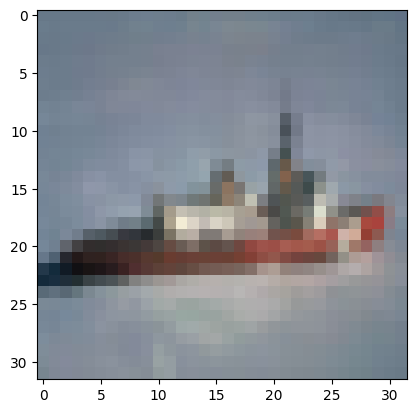

In [46]:
plt.imshow(dataset[0][0].permute(1, 2, 0))

In [47]:
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=64, shuffle=False, num_workers=2)

for batch_idx, (img, label) in enumerate(dataloader):
    img = img.to(device)

In [48]:
DATA_PATH = 'test/pickle/cifar10/resnet34/eval.p'
# Change the DATA_PATH to your local pickle file path

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

with open(DATA_PATH, "rb") as f:
    dataset = pickle.load(f)

print(type(dataset), len(dataset))
print(type(dataset[0]), len(dataset[0]))

print(type(dataset[0][0]), dataset[0][0].shape)
print(type(dataset[0][1]), dataset[0][1])
print(type(dataset[0][2]), dataset[0][2])
print(cifar.classes[dataset[0][1]])

<class 'list'> 200
<class 'list'> 3
<class 'torch.Tensor'> torch.Size([3, 32, 32])
<class 'int'> 5
<class 'int'> 1
dog


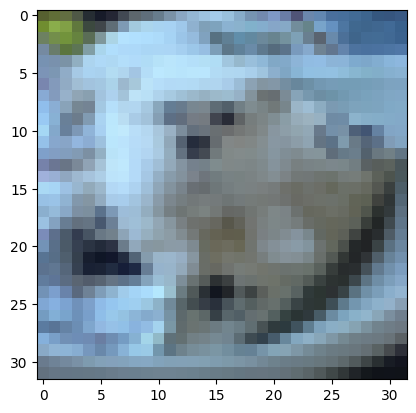

In [49]:
plt.imshow(dataset[0][0].permute(1, 2, 0))

In [50]:
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=100, shuffle=False, num_workers=2)

**Do not shuffle the test file. otherwise the order will mismatch with the answer.**

### Models

You need to conduct the experiments on two target model architectures (i.e., [ResNet34](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet34.html) and [MobileNetV2](https://pytorch.org/vision/main/models/generated/torchvision.models.mobilenet_v2.html)). The pre-trained model weights are provided in the `aamlm/models` folder. You can use the example code below to load the model weights for the ResNet34 target model trained on the CIFAR10 dataset.

In [51]:
MODEL_PATH = 'test/checkpoint/resnet34_cifar10/resnet34_cifar10_199.pth'
# Change the MODEL_PATH to your local model path

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

target_model = models.resnet34(num_classes=10).to(device)
# Change num_classes to 200 when you use the Tiny ImageNet dataset

state_dict = torch.load(MODEL_PATH, map_location=device)
target_model.load_state_dict(state_dict['net'])

print(target_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [52]:
for batch_idx, (imgs, labels, isMemeber) in enumerate(dataloader):
    imgs, labels = imgs.to(device), labels.to(device)
    outputs = target_model(imgs)
    print(outputs.shape)

    _, predicted = outputs.max(1)
    correct = predicted.eq(labels).sum().item()

    print(f"{correct}%")
    break

torch.Size([100, 10])
100%


## Submission

You need to **submit your final prediction results on the test dataset `test.p` to [hai.huang@cispa.de](mailto:hai.huang@cispa.de) or [yugeng.liu@cispa.de](mailto:yugeng.liu@cispa.de)** to be checked by us. There should be **four** prediction result files in your submission. The bar that you can attend the final exam is 0.82.

If you have successfully pass the test, you need to submit the code. **Plagiarism is never acceptable**.

Before the project deadline, you can submit multi-times, but we may not reply to you in time. It's better not to submit everything in the few minutes before the deadline. **Late submissions will not be accepted.**

In [22]:
DATA_PATH = 'test/pickle/cifar10/resnet34/test.p'

with open(DATA_PATH, "rb") as f:
    dataset = pickle.load(f)

prediction = [1 for i in range(len(dataset))]

np.save('./results/task0_resnet34_cifar10.npy', prediction)
np.save('./results/task1_mobilenetv2_cifar10.npy', prediction)
np.save('./results/task2_resnet34_tinyimagenet.npy', prediction)
np.save('./results/task3_mobilenetv2_tinyimagenet.npy', prediction)

### File Name

| File Name | Task ID | Dataset | Model |
| :- | :-: | :-: | :-: |
| `task0_resnet34_cifar10.npy` | 0 | CIFAR10 | ResNet34 |
| `task1_mobilenetv2_cifar10.npy` | 1 | CIFAR10 | MobileNetV2 |
| `task2_resnet34_tinyimagenet.npy` | 2 | Tiny ImageNet | ResNet34 |
| `task3_mobilenetv2_tinyimagenet.npy` | 3 | Tiny ImageNet | MobileNetV2 |

### Run the test code

In [53]:
!python run.py --path ./results

0.5


In [54]:
!python run.py --path ./c01hahu
print('꒦ິ^꒦ິ')

0.7824125
꒦ິ^꒦ິ


In [55]:
!python run.py --path ./zhenglisec
print('◔.̮◔✧')

0.8653625
◔.̮◔✧
